In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
data = pd.read_csv(r"C:\Users\amaya\Desktop\Sample\diabetes_small.csv",encoding='latin1')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4      128             82             15       53  26.6   
1            2       92             53             31       68  30.4   
2            1      101             66             15      172  29.9   
3            2      126             80             11       15  34.6   
4            1      137             80             27      117  28.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.223   18        1  
1                     0.073   26        1  
2                     0.183   42        1  
3                     0.339   18        1  
4                     0.313   18        1  


In [146]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [147]:

print(data['Outcome'].value_counts())

Outcome
1    139
0     61
Name: count, dtype: int64


In [148]:
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    data[col] = data[col].replace(0, data[col].median())


In [149]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [150]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [152]:
model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [153]:
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:,1]
print("accuracy_score",accuracy_score(y_test, Y_pred))
print("classification_report",classification_report(y_test, Y_pred)) 

accuracy_score 0.7
classification_report               precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           1       0.71      0.96      0.82        28

    accuracy                           0.70        40
   macro avg       0.61      0.52      0.48        40
weighted avg       0.65      0.70      0.62        40



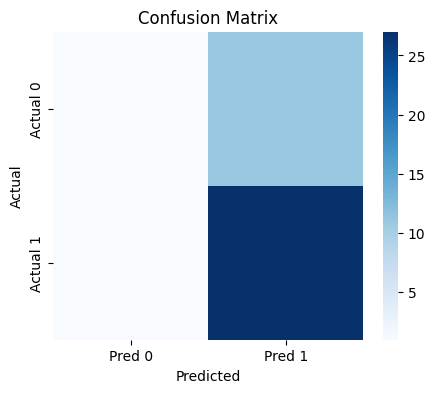

In [154]:
cm = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm , cmap="Blues" , xticklabels=['Pred 0', 'Pred 1'],  
            yticklabels=['Actual 0', 'Actual 1'])  
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()